In [1]:
using Distributions
arr = rand(Normal(80, 10), 200);

In [2]:
devi = std(arr)

9.760898460257383

In [6]:
var(arr)

95.27513875145496

In [7]:
mean(randn(100))

-0.13371641198411466

In [1]:
using Gadfly, DataFrames;

In [2]:
data = DataFrame(A = rand(1:10, 30), B = rand(1:10, 30), C  = rand(["P", "Q"], 30), D = rand(["X", "Y", "Z"], 30))

,A,B,C,D
1,2,1,Q,Z
2,5,4,Q,Y
3,7,10,P,Y
4,5,1,P,Z
5,4,6,P,Z
6,9,9,P,Y
7,3,10,P,X
8,6,5,Q,Y
9,7,1,Q,Y
10,9,3,P,Y


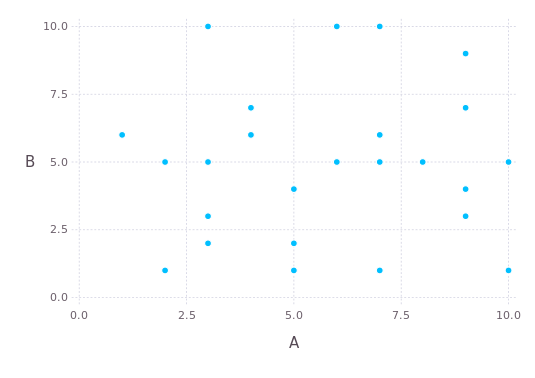

In [3]:
plot(data, x = "A", y ="B", Geom.point)

In [4]:
?plot

search: plot Plot TypedSlot set_default_plot_size set_default_plot_format


```
    function plot(data_source::@compat(Union{AbstractMatrix, AbstractDataFrame}),
              elements::ElementOrFunctionOrLayers...; mapping...)
```

Create a new plot.

Grammar of graphics style plotting consists of specifying a dataset, one or more plot elements (scales, coordinates, geometries, etc), and binding of aesthetics to columns or expressions of the dataset.

For example, a simple scatter plot would look something like:

plot(my_data, Geom.point, x="time", y="price")

Where "time" and "price" are the names of columns in my_data.

### Args:

  * data_source: Data to be bound to aesthetics.
  * elements: Geometries, statistics, etc.
  * mapping: Aesthetics symbols (e.g. :x, :y, :color) mapped to names of columns in the data frame or other expressions.

```
function plot(data_source::@compat(Union{(@compat Void), AbstractMatrix, AbstractDataFrame}),
              mapping::Dict, elements::ElementOrFunctionOrLayers...)
```

The old fashioned (pre named arguments) version of plot.

This version takes an explicit mapping dictionary, mapping aesthetics symbols to expressions or columns in the data frame.

### Args:

  * data_source: Data to be bound to aesthetics.
  * mapping: Dictionary of aesthetics symbols (e.g. :x, :y, :color) to           names of columns in the data frame or other expressions.
  * elements: Geometries, statistics, etc.

### Returns:

A Plot object.


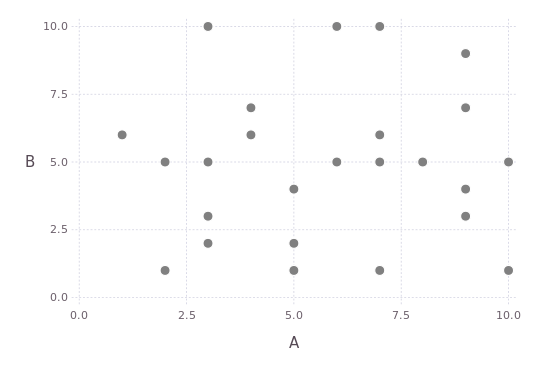

In [8]:
#http://gadflyjl.org/stable/man/themes.html
plot(data, x = "A", y ="B", Geom.point, Theme(default_color = "gray", point_size = 5px))

ygroup
ygroup


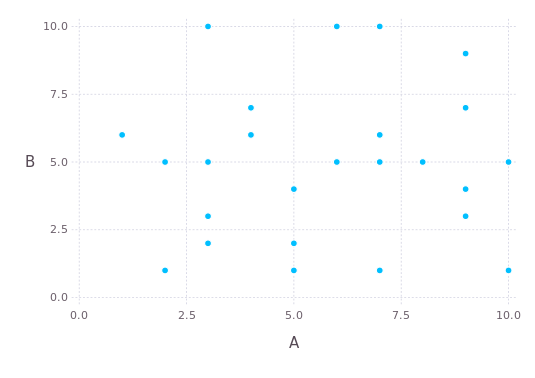

ygroup


In [10]:
plot(data, x = "A", y = "B", ygroup = "C", Geom.point)

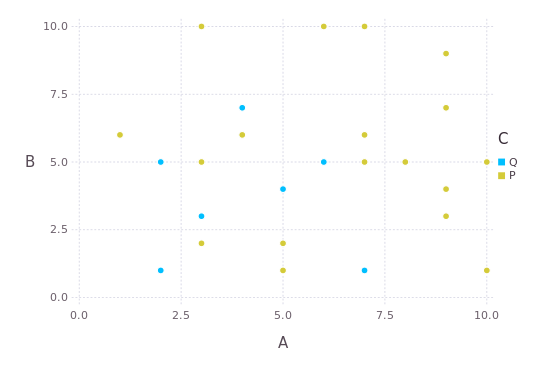

In [12]:
plot(data, x = "A", y ="B", color = "C", Geom.point, Guide.colorkey("C"))

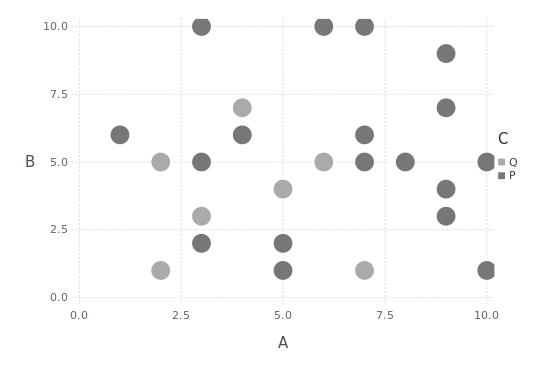

In [16]:
plot(data, x = :A, y = :B, color = :C, Geom.point, Guide.colorkey("C"), Scale.color_discrete_manual(colorant"#AAAAAA", colorant"#777777"), Theme(point_size = 10px))

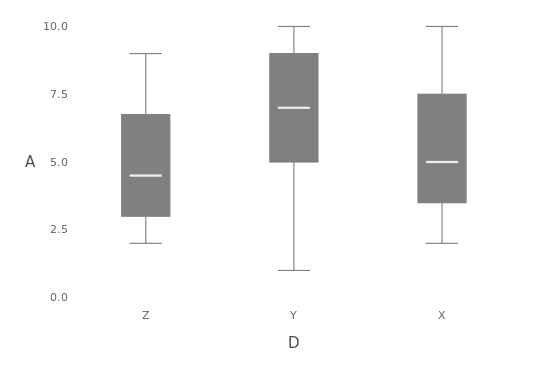

In [18]:
plot(data, x = "D", y = "A", Geom.boxplot, Theme(boxplot_spacing = 100px, grid_color = "white", default_color = "grey"))

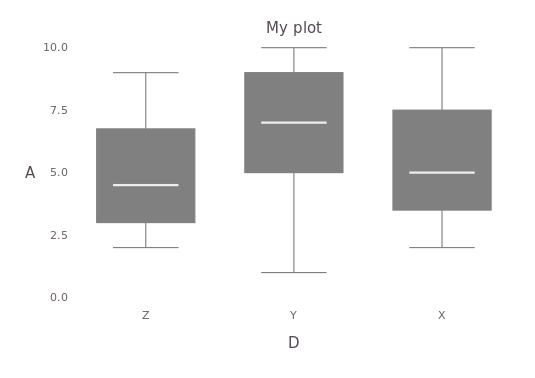

In [19]:
plot(data, x = "D", y = "A", Geom.boxplot, Guide.title("My plot"), Theme(boxplot_spacing = 50px, grid_color = "white", default_color = "grey"))

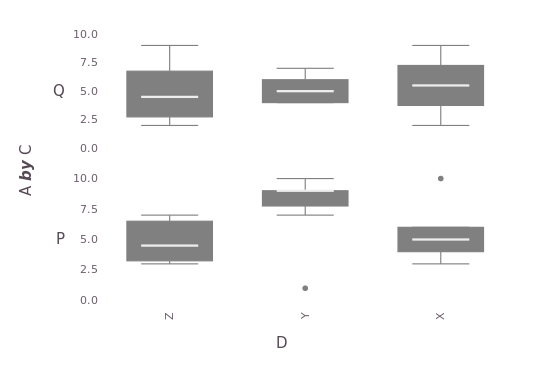

In [22]:
# Recreate the plot in Question 7 but add a ygroup based on the unique values in column C
plot(data, ygroup = "C", x = "D", y = "A", Geom.subplot_grid(Geom.boxplot), Theme(default_color = "grey", grid_color = "white", grid_color_focused = "white", boxplot_spacing = 50px))

In [23]:
# Add column E with 30 values form the standard normal distribution
data[:E] = randn(30)

30-element Array{Float64,1}:
  1.4146    
  0.346848  
 -0.419957  
 -1.00357   
 -0.466686  
  0.638651  
 -0.340064  
  0.679676  
  0.00107457
 -1.6196    
  0.9274    
 -0.604652  
  0.661171  
  ⋮         
  0.551026  
  0.532837  
  1.26163   
 -1.1602    
  0.108402  
  0.636995  
 -0.837106  
  0.427222  
  0.837802  
 -0.334189  
  0.194144  
  0.220466  

In [24]:
data

,A,B,C,D,E
1,2,1,Q,Z,1.4146
2,5,4,Q,Y,0.346848
3,7,10,P,Y,-0.419957
4,5,1,P,Z,-1.00357
5,4,6,P,Z,-0.466686
6,9,9,P,Y,0.638651
7,3,10,P,X,-0.340064
8,6,5,Q,Y,0.679676
9,7,1,Q,Y,0.00107457
10,9,3,P,Y,-1.6196


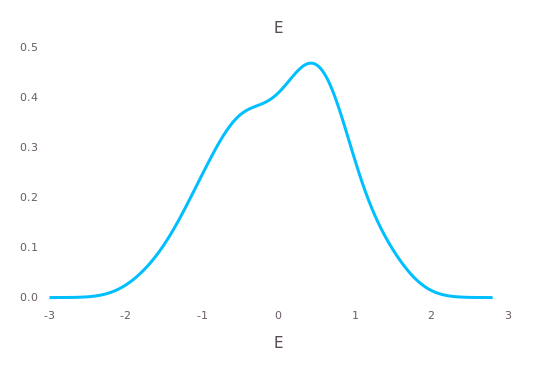

In [25]:
# Create a density plot from the values in column E and draw a 2px red vertical line through the actual mean
plot(data, x = :E, Geom.density, Guide.title("E"), Theme(grid_color = "white", grid_color_focused = "white", line_width = 3px))

In [26]:
plot!(Geom.smooth(method = mean(data[E])), Theme(line_width = 2px, default_color = colorant"red"))

LoadError: [91mUndefVarError: plot! not defined[39m

In [27]:
plot(layer(data, x = :E, Geom.density, Guide.title("E"), Theme(grid_color = "white", grid_color_focused = "white", line_width = 3px)), layer(Geom.smooth(method = mean(data[E])), Theme(line_width = 2px, default_color = colorant"red")))

LoadError: [91mLayers can't be used with elements of type Gadfly.Guide.Title[39m

In [29]:
mean(data[:E])

0.01481383644613512

In [30]:
plot(data, x = :E, Geom.density, Guide.title("E"), xintercept = mean(data[:E]), Geom.vline(size = 2px, color = colorant"Red"), Theme(grid_color = "white", grid_color_focused = "white", line_width = 3px))

LoadError: [91mMethodError: no method matching evalmapping(::DataFrames.DataFrame, ::Float64)[0m
Closest candidates are:
  evalmapping(::DataFrames.AbstractDataFrame, [91m::Symbol[39m) at /home/jrun/.julia/v0.6/Gadfly/src/mapping.jl:285
  evalmapping(::DataFrames.AbstractDataFrame, [91m::AbstractString[39m) at /home/jrun/.julia/v0.6/Gadfly/src/mapping.jl:286
  evalmapping(::DataFrames.AbstractDataFrame, [91m::Integer[39m) at /home/jrun/.julia/v0.6/Gadfly/src/mapping.jl:287
  ...[39m

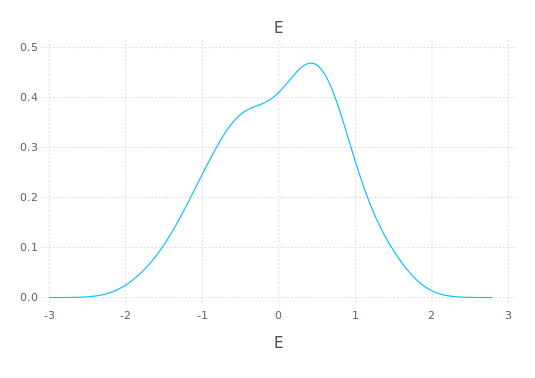

In [31]:
plot(data, x = :E, Geom.density, Guide.title("E"))

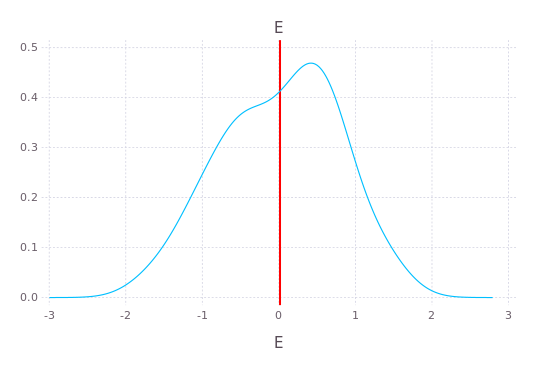

In [33]:
plot(data, x = :E, Geom.density, Guide.title("E"), xintercept = [mean(data[:E])], Geom.vline(size = 2px, color = colorant"Red"))